In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d adrianmcmahon/imdb-india-movies

imdb-india-movies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/imdb-india-movies.zip

Archive:  /content/imdb-india-movies.zip
replace IMDb Movies India.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Feature Engineering
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split, KFold, cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline


In [ ]:
# data=pd.read_csv("/content/IMDb Movies India.csv")
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')

In [ ]:
data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [ ]:
data.shape

(15509, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# To test if there are duplicates in the dataset or not
print ( data.duplicated() )

print ( data.duplicated().sum() )

0        False
1        False
2        False
3        False
4        False
         ...  
15504    False
15505    False
15506    False
15507    False
15508    False
Length: 15509, dtype: bool
6


In [ ]:
data.drop_duplicates(subset=['Name', 'Year'],keep=False, inplace=True, ignore_index=True)

In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data.drop(["Name"],axis=1,inplace=True)

In [ ]:
data["Year"].value_counts

<bound method IndexOpsMixin.value_counts of 0           NaN
1        (2019)
2        (2021)
3        (2019)
4        (2010)
          ...  
15456    (1988)
15457    (1999)
15458    (2005)
15459    (1988)
15460    (1998)
Name: Year, Length: 15461, dtype: object>

In [ ]:
data["Year"].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [ ]:
# Replace parentheses from the 'Category' column
data["Year"] = data["Year"].str.replace(r'\(|\)', '', regex=True)

In [ ]:
data['Duration'].value_counts

<bound method IndexOpsMixin.value_counts of 0            NaN
1        109 min
2         90 min
3        110 min
4        105 min
          ...   
15456        NaN
15457    129 min
15458        NaN
15459        NaN
15460    130 min
Name: Duration, Length: 15461, dtype: object>

In [ ]:
# Replace parentheses from the 'Category' column
data["Duration"] = data["Duration"].str.replace('min', '', regex=True)

In [ ]:
data["Genre"].value_counts

<bound method IndexOpsMixin.value_counts of 0                  Drama
1                  Drama
2         Drama, Musical
3        Comedy, Romance
4                  Drama
              ...       
15456             Action
15457      Action, Drama
15458             Action
15459             Action
15460      Action, Drama
Name: Genre, Length: 15461, dtype: object>

In [ ]:
data["Rating"].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15456    4.6
15457    4.5
15458    NaN
15459    NaN
15460    6.2
Name: Rating, Length: 15461, dtype: float64>

In [ ]:
data["Votes"].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1          8
2        NaN
3         35
4        NaN
        ... 
15456     11
15457    655
15458    NaN
15459    NaN
15460     20
Name: Votes, Length: 15461, dtype: object>

In [ ]:
data["Director"].value_counts

<bound method IndexOpsMixin.value_counts of 0             J.S. Randhawa
1             Gaurav Bakshi
2        Soumyajit Majumdar
3                Ovais Khan
4              Amol Palekar
                ...        
15456         Mahendra Shah
15457            Kuku Kohli
15458            Kiran Thej
15459                   NaN
15460          K.C. Bokadia
Name: Director, Length: 15461, dtype: object>

In [ ]:
data["Actor 1"].value_counts

<bound method IndexOpsMixin.value_counts of 0                Manmauji
1            Rasika Dugal
2            Sayani Gupta
3                 Prateik
4            Rajat Kapoor
               ...       
15456    Naseeruddin Shah
15457        Akshay Kumar
15458     Sangeeta Tiwari
15459                 NaN
15460          Dharmendra
Name: Actor 1, Length: 15461, dtype: object>

In [ ]:
# To get the number of null values in each feature ( missing values )
data.isnull().sum()

Year         526
Duration    8235
Genre       1865
Rating      7554
Votes       7553
Director     521
Actor 1     1607
Actor 2     2370
Actor 3     3122
dtype: int64

In [ ]:
#Total columns having missing values
cols_missing= data.isnull().sum() != 0
cols_missing.sum()

9

In [ ]:
# Fill missing values in the of numeric features with appropriate method ( the median )
numeric_features = data.select_dtypes(include=np.number)
for feature in numeric_features :
    data[feature].fillna(data[feature].median(), inplace=True)
numeric_features

Rating
0         NaN
1         7.0
2         NaN
3         4.4
4         NaN
...       ...
15456     4.6
15457     4.5
15458     NaN
15459     NaN
15460     6.2

[15461 rows x 1 columns]

In [ ]:
# Fill missing values in the rest of categorical features with appropriate method ( the mode )
categorical_features = data.select_dtypes(include=object)
for feature in categorical_features :
    data[feature].fillna(data[feature].mode()[0], inplace=True)
categorical_features.columns

Index(['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

In [ ]:
# To get the number of null values in each feature ( missing values ) after handling
data.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
# Convert 'Numbers' column from object to int using astype()
data["Year"]= data["Year"].astype(int)

In [ ]:
# Convert 'Numbers' column from object to int using astype()
data["Duration"]=data["Duration"].astype(int)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


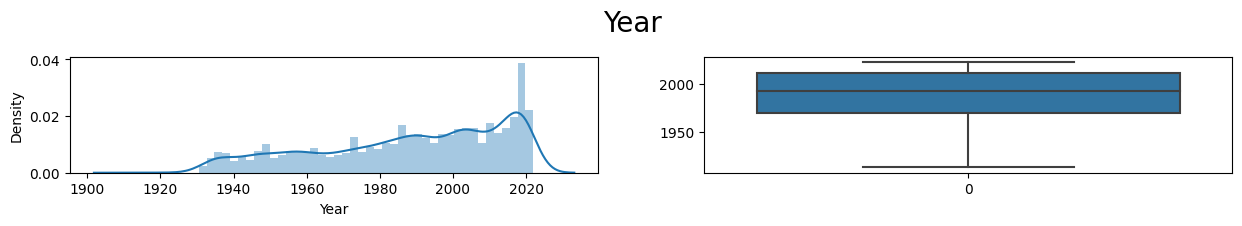

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


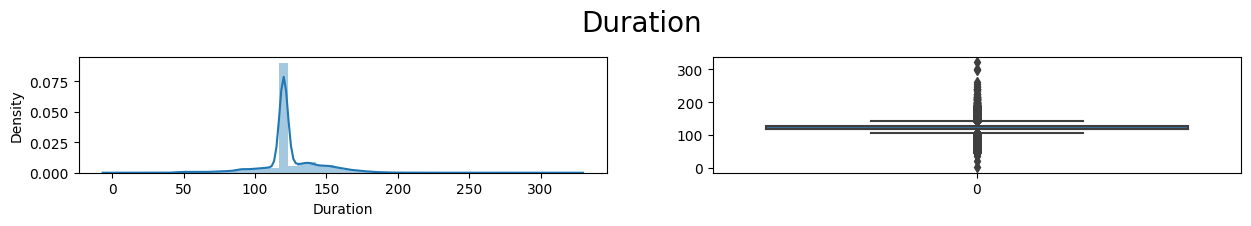

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


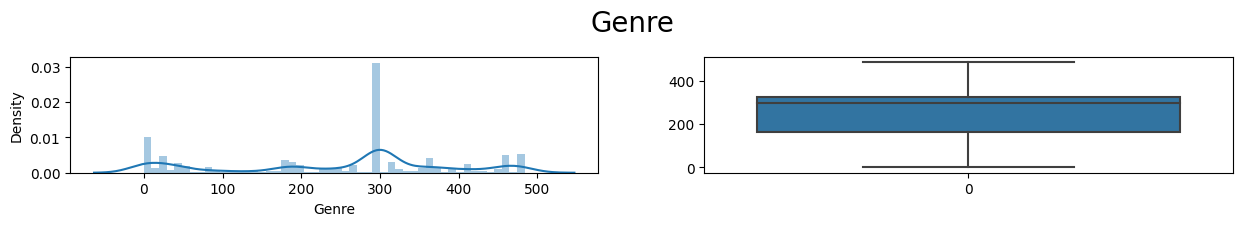

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


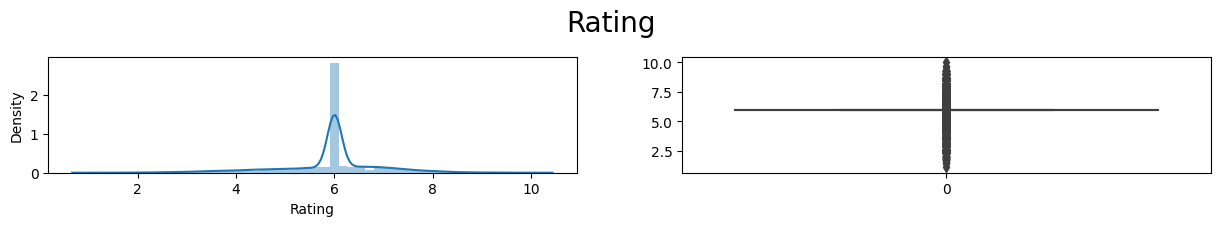

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


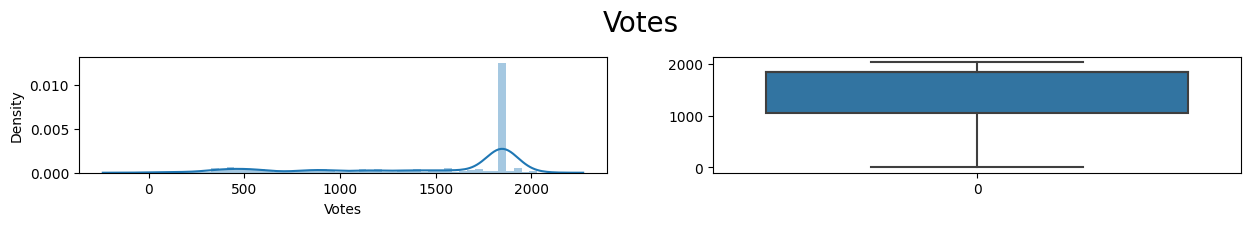

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


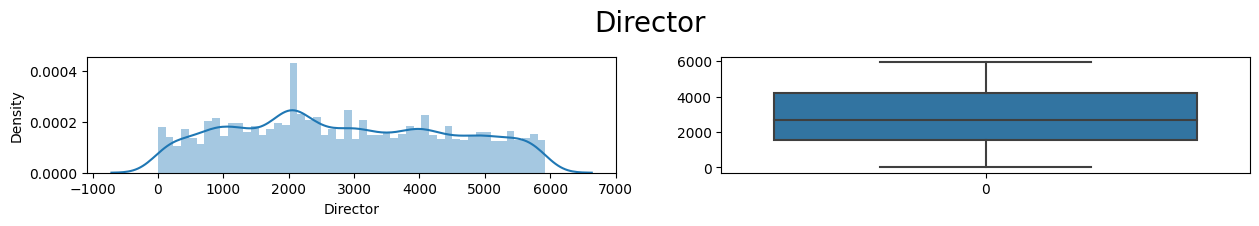

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


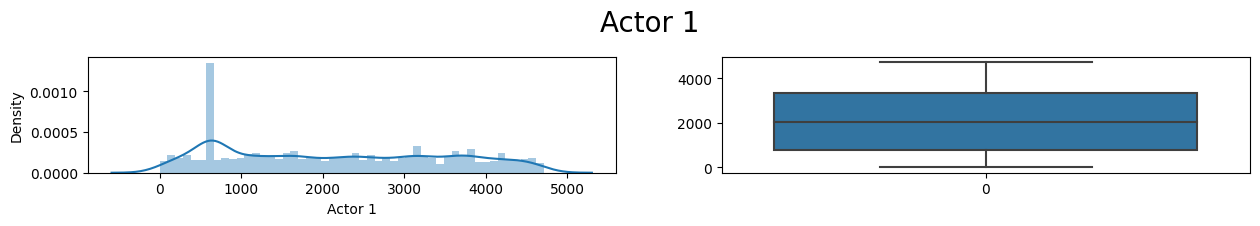

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


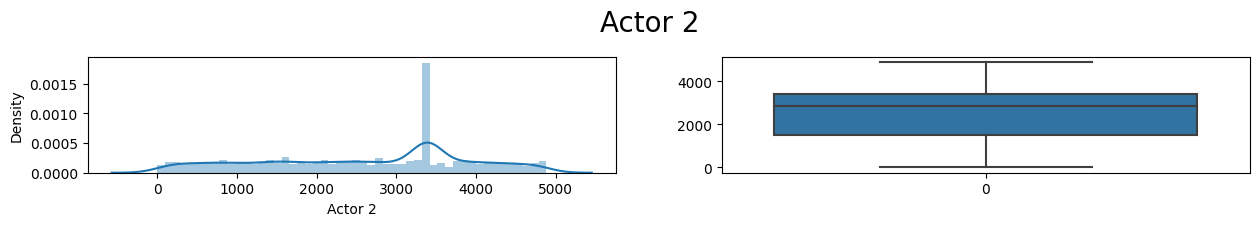

<ipython-input-557-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


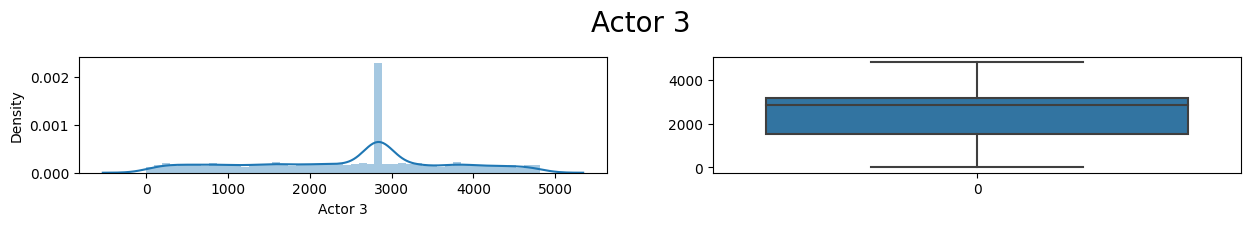

In [ ]:
for col in data.columns:
    fig,ax = plt.subplots(1,2,figsize=(15,1.5))
    if len(np.unique(data[col]))<10:
        sns.countplot(data[col],ax=ax[0])
    else:
        sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])

    sns.boxplot(data[col],ax=ax[1])
    plt.suptitle(col,fontsize=20,y=1.2)
    plt.show()

In [ ]:
# To replace outliers in specific features whether with max , min values in the column
for x in (data[["Duration"]]):
    Q3,Q1 = np.percentile(data.loc[:,x],[75,25])
    IQR = Q3-Q1

    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)

    data.loc[data[x] > max,x] = max
    data.loc[data[x] <min,x] = min

In [ ]:
data["Rating"]

0        6.0
1        7.0
2        6.0
3        4.4
4        6.0
        ... 
15456    4.6
15457    4.5
15458    6.0
15459    6.0
15460    6.2
Name: Rating, Length: 15461, dtype: float64

In [ ]:
data.corr()

Year  Duration     Genre    Rating     Votes  Director  \
Year      1.000000 -0.106487 -0.050231 -0.111224 -0.161391  0.085442   
Duration -0.106487  1.000000 -0.174899 -0.021045 -0.250228  0.024042   
Genre    -0.050231 -0.174899  1.000000  0.105652  0.142347 -0.025247   
Rating   -0.111224 -0.021045  0.105652  1.000000  0.083142 -0.012299   
Votes    -0.161391 -0.250228  0.142347  0.083142  1.000000 -0.036465   
Director  0.085442  0.024042 -0.025247 -0.012299 -0.036465  1.000000   
Actor 1   0.049929  0.052914 -0.045839 -0.003856 -0.087288  0.045432   
Actor 2  -0.010307 -0.045773  0.043556  0.040050  0.053411 -0.002955   
Actor 3  -0.013935 -0.049423  0.032380  0.035398  0.044129 -0.009892   

           Actor 1   Actor 2   Actor 3  
Year      0.049929 -0.010307 -0.013935  
Duration  0.052914 -0.045773 -0.049423  
Genre    -0.045839  0.043556  0.032380  
Rating   -0.003856  0.040050  0.035398  
Votes    -0.087288  0.053411  0.044129  
Director  0.045432 -0.002955 -0.009892  
Actor 1   1.000000 -0.046109 -0.021251  
Actor 2  -0.046109  1.000000  0.056509  
Actor 3  -0.021251  0.056509  1.000000

<Axes: >

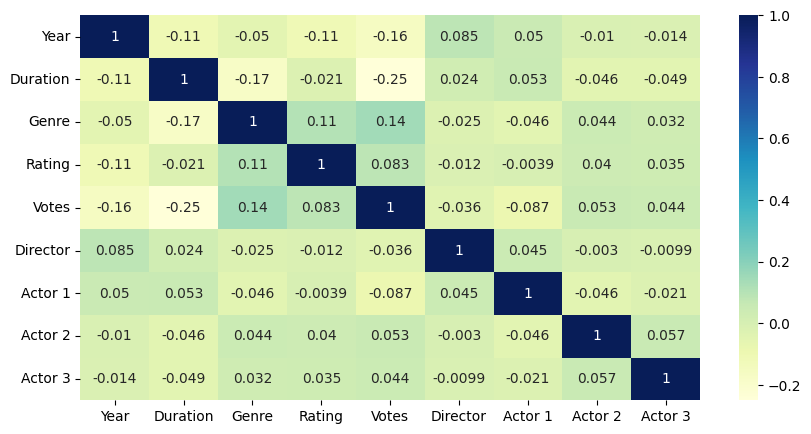

In [ ]:
# Matrix form for correlation data
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

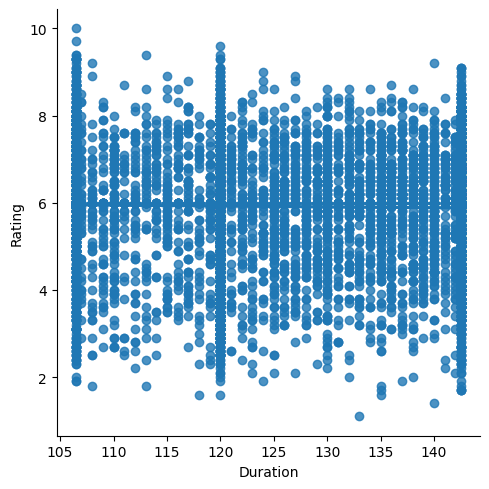

In [ ]:
sns.lmplot(x='Duration',y='Rating',data=data)

<ipython-input-563-d48c0144d0d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Actor 1'])


<Axes: xlabel='Actor 1', ylabel='Density'>

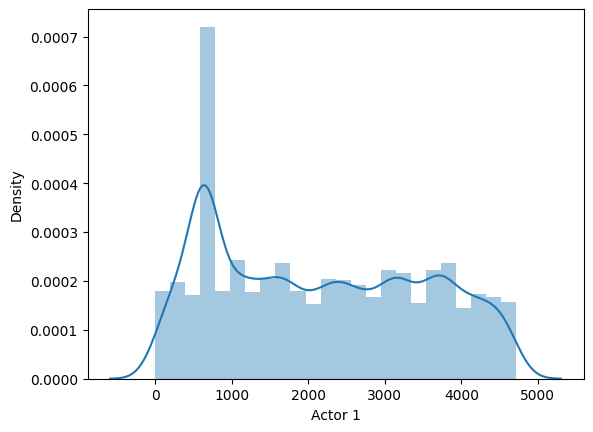

In [ ]:
sns.distplot(data['Actor 1'])

(array([[    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  4648., 10813.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.],
        [15461.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.],
        [ 5037.,  8077.,  2347.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.],
        [15461.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.

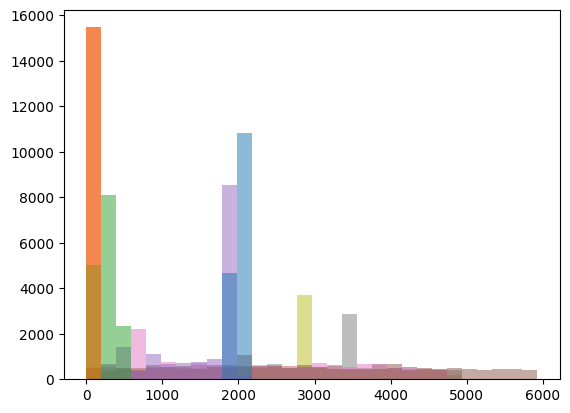

In [ ]:
plt.hist(data, bins=30, alpha=0.5, histtype = 'stepfilled',  edgecolor='none')

(array([ 242.,  690., 1506.,  448.,  936.,  825.,  785.,  722.,  793.,
        8514.]),
 array([   0. ,  203.1,  406.2,  609.3,  812.4, 1015.5, 1218.6, 1421.7,
        1624.8, 1827.9, 2031. ]),
 <BarContainer object of 10 artists>)

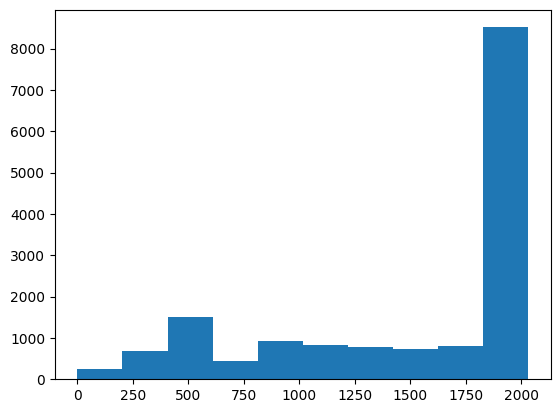

In [ ]:
plt.hist(data["Votes"])

<ipython-input-566-45420091fd5b>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["Duration"], data["Year"], alpha=0.2,  cmap='viridis')


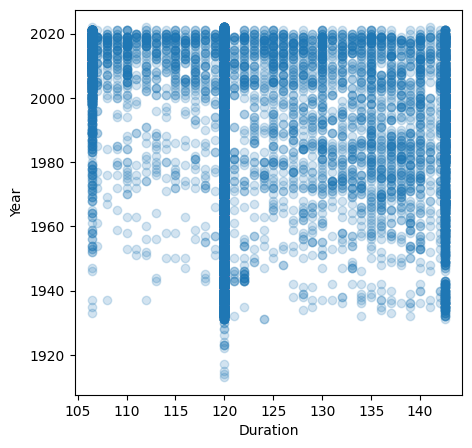

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(data["Duration"], data["Year"], alpha=0.2,  cmap='viridis')
plt.xlabel("Duration")
plt.ylabel("Year");

<ipython-input-567-794d3731dfb9>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["Votes"], data["Director"], alpha=0.2,  cmap='viridis')


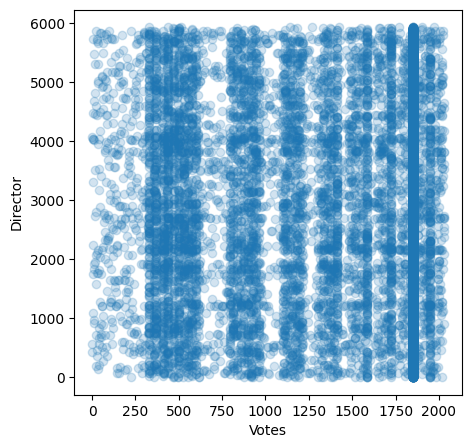

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(data["Votes"], data["Director"], alpha=0.2,  cmap='viridis')
plt.xlabel("Votes")
plt.ylabel("Director");

In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas_profiling

In [ ]:
# Generate a Pandas Profiling Report for initial data exploration
report = pandas_profiling.ProfileReport(data)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Spliting target variable and independent variables
X = data.drop(['Rating'], axis = 1)
y = data['Rating']

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# 1. Mutual Information (MI) Score
mi_scores = mutual_info_regression(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_top_6_features = mi_scores_df.sort_values(by='MI Score', ascending=False).head(6)
# Print selected features for each method
print("Top 6 features based on Mutual Information (MI) Score:")
print(mi_top_6_features)
print()

Top 6 features based on Mutual Information (MI) Score:
    Feature  MI Score
3     Votes  0.595084
5   Actor 1  0.183806
2     Genre  0.183453
1  Duration  0.174939
7   Actor 3  0.149009
6   Actor 2  0.135106



In [ ]:
data_new=data[["Votes","Actor 1","Genre","Duration","Actor 2","Actor 3","Rating"]]

In [ ]:
# Spliting target variable and independent variables
X = data_new.drop(['Rating'], axis = 1)
y = data_new['Rating']

In [ ]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)


In [ ]:
# Initialize the Decision Tree Regressor model
DTR_model = DecisionTreeRegressor(random_state=36)

# Fit the model to the training data
DTR_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = DTR_model.predict(X_test)

# Evaluate the model
r2 =abs( r2_score(y_test, y_pred))
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Decision Tree Regressor R2 score:", r2)
print("Decision Tree Regressor RMSE:", rmse)

Decision Tree Regressor R2 score: 0.757412232091168
Decision Tree Regressor RMSE: 1.3030753244555788


In [ ]:
# Initialize the Lasso regression model with regularization parameter alpha
lasso_model = Lasso(alpha=0.5,max_iter=5000)
# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Lasso R-squared score: {r2}")

Lasso R-squared score: 0.016497284334555773
